- Introdução do problema a ser resolvido

Dicionário dos dados:
    
data_iniSE:  primeiro dia da semana epidemiológica (domingo);

SE:  epidemiological week;

casos_est: Número estimado de casos por semana utilizando o modelo nowcasting (nota: Os valores são atualizados retrospectivamente todas as semanas);

casos_est_min e casos_est_max: 95% credibility interval of the estimated number of cases;

casos: Número de casos notificados por semana (Os valores são atualizados retrospectivamente todas as semanas);

p_rt1: Probabilidade de (Rt>1). Para emissão do alerta laranja utilizamos o critério p_rt1 > 0,95 por 3 semanas ou mais;

p_inc100k: Taxa de incidência estimada por 100 mil;

Localidade_id: Divisão submunicipal (atualmente implementada apenas no Rio de Janeiro);

nivel: Nível de alerta (1 = verde, 2 = amarelo, 3 = laranja, 4 = vermelho);

id: Índice numérico;

versao_modelo: Model version (internal use);

Rt: Estimativa pontual do número reprodutivo de casos, veja (Saiba mais);

pop: população estimada (IBGE);

tempmin: média das temperaturas mínimas diárias ao longo da semana;

umidmax: média da umidade relativa do ar máxima diária ao longo da semana;

receptivo: indica receptividade climática, ou seja, condições para alta capacidade vetorial. 0 = desfavorável, 1 = favorável, 2 = favorável nesta semana e na semana passada, 3 = favorável durante pelo menos três semanas (suficiente para completar um ciclo de transmissão);

transmissão: evidência de transmissão sustentada: 0 = nenhuma evidência, 1 = possível, 2 = provável, 3 = altamente provável;

nivel_inc: Incidência estimada abaixo do limiar pré-epidêmico, 1 = acima do limiar pré-epidêmico, mas abaixo do limiar epidêmico, 2 = acima do limiar epidêmico;

notif_accum_year: número acumulado de casos por ano;

In [111]:
#Importando a biblioteca

import pandas as pd
import numpy as np
# Importação de pacotes
#import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from matplotlib import cm

##API DENGUE

Infodengue's tables have data aggregated by week, provided by different sources. They could be consulted by a form, or directly from Python, via consult of an API. This functionality is available via the URL: https://info.dengue.mat.br/api/alertcity?params: must contain the following parameters:

geocode: city's IBGE code

disease: desease type to be consulted (str:dengue|chikungunya|zika)

format: file extension/format (str:json|csv)

ew_start: epidemiological week initial consultation (int:1-53)

ew_end: epidemiological week final consultation (int:1-53)

ey_start: year of initial consultation (int:0-9999)

ey_end: year of final consultation (int:0-9999)

Every parameter mentioned so far is obligatory for the consultation. The following example shows the requisition of the register of dengue between 1 and 52 of the year 2020, in Rio de Janeiro (geocodigo = 3304557) on CSV: https://info.dengue.mat.br/api/alertcity?geocode=3304557&disease=dengue&format=csv&ew_start=1&ew_end=52&ey_start=2021&ey_end=2021

In [112]:
# Consumunindo API - Rio de Janeiro

url = "https://info.dengue.mat.br/api/alertcity"
geocode = 3304557 # Rio de Janeiro
disease = "dengue"
format = "csv"
ew_start = 1
ew_end = 53
ey_start = 2013
ey_end = 2024

params =(
    "&disease="
    + f"{disease}"
    + "&geocode="
    + f"{geocode}"
    + "&disease="
    + f"{disease}"
    + "&format="
    + f"{format}"
    + "&ew_start="
    + f"{ew_start}"
    + "&ew_end="
    + f"{ew_end}"
    + "&ey_start=" 
    + f"{ey_start}"
    + "&ey_end="
    + f"{ey_end}"    
)

url_resp = "?".join([url, params])

#Transformando o dataset em um dataframe
df_rio = pd.read_csv(url_resp, index_col='SE')

#Criando uma nova coluna vinculando a cidade
#Assim cada consumo da API ja vai identificada 

df_rio['cidade'] = 'Rio de Janeiro'

#Exibindo o dataframe
df_rio.head()

#url_resp

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
df_rio.shape

In [ ]:
# Consumunindo API - Duque de Caxias

url = "https://info.dengue.mat.br/api/alertcity"
geocode = 3301702 # Duque de Caxias
disease = "dengue"
format = "csv"
ew_start = 1
ew_end = 53
ey_start = 2013
ey_end = 2024

params =(
    "&disease="
    + f"{disease}"
    + "&geocode="
    + f"{geocode}"
    + "&disease="
    + f"{disease}"
    + "&format="
    + f"{format}"
    + "&ew_start="
    + f"{ew_start}"
    + "&ew_end="
    + f"{ew_end}"
    + "&ey_start=" 
    + f"{ey_start}"
    + "&ey_end="
    + f"{ey_end}"    
)

url_resp_dqc = "?".join([url, params])

#Transformando o dataset em um dataframe
df_caxias = pd.read_csv(url_resp_dqc, index_col='SE')

#Adicionando nova coluna

df_caxias['cidade'] = 'Duque de Caxias'

#Exibindo o dataframe

df_caxias.head()
#url_resp

In [ ]:
# Consumunindo API - São João de Meriti

url = "https://info.dengue.mat.br/api/alertcity"
geocode = 3305109 # São João de Meriti
disease = "dengue"
format = "csv"
ew_start = 1
ew_end = 53
ey_start = 2013
ey_end = 2024

params =(
    "&disease="
    + f"{disease}"
    + "&geocode="
    + f"{geocode}"
    + "&disease="
    + f"{disease}"
    + "&format="
    + f"{format}"
    + "&ew_start="
    + f"{ew_start}"
    + "&ew_end="
    + f"{ew_end}"
    + "&ey_start=" 
    + f"{ey_start}"
    + "&ey_end="
    + f"{ey_end}"    
)

url_resp_sjm = "?".join([url, params])
#url_resp

#Transformando o dataset em um dataframe
df_sjm = pd.read_csv(url_resp_sjm, index_col='SE')

#Adicionando nova coluna

df_sjm['cidade'] = ' São João de Meriti'

# Exibindo do dataframe
df_sjm.head()

In [ ]:
# Consumunindo API - Niteroi

url = "https://info.dengue.mat.br/api/alertcity"
geocode = 3303302 # Niteroi
disease = "dengue"
format = "csv"
ew_start = 1
ew_end = 53
ey_start = 2013
ey_end = 2024

params =(
    "&disease="
    + f"{disease}"
    + "&geocode="
    + f"{geocode}"
    + "&disease="
    + f"{disease}"
    + "&format="
    + f"{format}"
    + "&ew_start="
    + f"{ew_start}"
    + "&ew_end="
    + f"{ew_end}"
    + "&ey_start=" 
    + f"{ey_start}"
    + "&ey_end="
    + f"{ey_end}"    
)

url_resp_nit = "?".join([url, params])
#url_resp

#Transformando o dataset em um dataframe
df_niteroi = pd.read_csv(url_resp_nit, index_col='SE')

#Adicionando uma nova coluna

df_niteroi['cidade'] = 'Niteroi'

#Exibindo o dataframe

df_niteroi.head()

In [ ]:
# Consumunindo API - Belfort Roxo

url = "https://info.dengue.mat.br/api/alertcity"
geocode = 3300456 # Belfort Roxo
disease = "dengue"
format = "csv"
ew_start = 1
ew_end = 53
ey_start = 2013
ey_end = 2024

params =(
    "&disease="
    + f"{disease}"
    + "&geocode="
    + f"{geocode}"
    + "&disease="
    + f"{disease}"
    + "&format="
    + f"{format}"
    + "&ew_start="
    + f"{ew_start}"
    + "&ew_end="
    + f"{ew_end}"
    + "&ey_start=" 
    + f"{ey_start}"
    + "&ey_end="
    + f"{ey_end}"    
)

url_resp_bfr = "?".join([url, params])

df_belfort = pd.read_csv(url_resp_bfr, index_col='SE')
#url_resp

#Adicionando uma nova coluna

df_belfort['cidade'] = 'Belfort roxo'

#Exibindo o dataframe

df_belfort.head()

In [ ]:
# Consumunindo API - Nova Iguaçu

url = "https://info.dengue.mat.br/api/alertcity"
geocode = 3303500 # Nova Iguaçu
disease = "dengue"
format = "csv"
ew_start = 1
ew_end = 53
ey_start = 2013
ey_end = 2024

params =(
    "&disease="
    + f"{disease}"
    + "&geocode="
    + f"{geocode}"
    + "&disease="
    + f"{disease}"
    + "&format="
    + f"{format}"
    + "&ew_start="
    + f"{ew_start}"
    + "&ew_end="
    + f"{ew_end}"
    + "&ey_start=" 
    + f"{ey_start}"
    + "&ey_end="
    + f"{ey_end}"    
)

url_resp_nvi = "?".join([url, params])

#Transformando o dataset em dataframe
df_niteroi = pd.read_csv(url_resp_nvi, index_col='SE')

#Adicionando uma nova coluna


#url_resp

In [ ]:
# Consumunindo API - Nilopolis

url = "https://info.dengue.mat.br/api/alertcity"
geocode = 3303203 # Nilopolis
disease = "dengue"
format = "csv"
ew_start = 1
ew_end = 53
ey_start = 2013
ey_end = 2024

params =(
    "&disease="
    + f"{disease}"
    + "&geocode="
    + f"{geocode}"
    + "&disease="
    + f"{disease}"
    + "&format="
    + f"{format}"
    + "&ew_start="
    + f"{ew_start}"
    + "&ew_end="
    + f"{ew_end}"
    + "&ey_start=" 
    + f"{ey_start}"
    + "&ey_end="
    + f"{ey_end}"    
)

url_resp_nlp = "?".join([url, params])

#Transformando o dataset em dataframe
df_niteroi = pd.read_csv(url_resp_nlp, index_col='SE')

#Adicionando uma novo coluna

df_niteroi['cidade'] = 'Niteroi'

#Exibindo o dataframe
df_niteroi.head()

#url_resp


In [ ]:
#Concatenando os dataframe em apenas 1

df_dados = pd.concat([df_belfort,df_caxias,df_niteroi,df_rio,df_sjm])

#Exibindo o dataframe

df_dados.head()

In [ ]:
#Criando um nova coluna e atribuindo valor a ela

In [ ]:
#Verificando as colunas 

df_dados.info()

In [ ]:
#Especificando as penas as colunas que irei usar

df_dados_01 = df_dados.drop(['casprov','casprov_est','casprov_est_min','casprov_est_max','casconf','versao_modelo','id','tweet','Localidade_id'],axis=1)

df_dados_01.info()

In [ ]:
#Transformando o tipo da coluna em date

df_dados_01['data_iniSE'] = pd.to_datetime(df_dados_01['data_iniSE'])

#exibindo as info

df_dados_01.info()

In [110]:
#PEgando a data, exibindo e nome do mes de da informção e mostrando as variações
df_dados_01['Mes_epidemia'] = df_dados_01['data_iniSE'].dt.month_name()

#Criando um dicionario para utilizar na transformação do nome ingles no portugues

dict_mes_ptbr = {'January':'Janeiro',
                 'February':'Fevereiro',
                 'March':'Março',
                 'April':'Abril',
                 'May':'Maio',
                 'June':'Junho',
                 'July':'Julho',
                 'August':'Agosto',
                 'September':'Setembro',
                 'October':'Outubro',
                 'November':'Novembro',
                 'December':'Dezembro'
                    }

#Fazendo um replace para substituindo o nome do mes de ingles para portugues

df_dados_01['Mes_epidemia'].replace(dict_mes_ptbr, inplace=True)

#Exbindo

df_dados_01['Mes_epidemia'].unique()



array(['Fevereiro', 'Janeiro', 'Dezembro', 'Novembro', 'Outubro',
       'Setembro', 'Agosto', 'Julho', 'Junho', 'Maio', 'Abril', 'Março'],
      dtype=object)

In [20]:
#Verificando os nulos

df_dados_01.isnull().sum()

data_iniSE           0
casos_est            0
casos_est_min        0
casos_est_max        4
casos                0
p_rt1                0
p_inc100k            0
nivel                0
Rt                   0
pop                  0
tempmin              0
umidmax             90
receptivo            0
transmissao          0
nivel_inc            0
umidmed             90
umidmin             90
tempmed             90
tempmax             90
notif_accum_year     0
cidade               0
dtype: int64

In [21]:
#VErificando o tipo das colunas
df_dados_nulos = df_dados_01[df_dados_01['tempmax'].isna()]

df_dados_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 202348 to 201737
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_iniSE        90 non-null     datetime64[ns]
 1   casos_est         90 non-null     float64       
 2   casos_est_min     90 non-null     int64         
 3   casos_est_max     90 non-null     float64       
 4   casos             90 non-null     int64         
 5   p_rt1             90 non-null     float64       
 6   p_inc100k         90 non-null     float64       
 7   nivel             90 non-null     int64         
 8   Rt                90 non-null     float64       
 9   pop               90 non-null     float64       
 10  tempmin           90 non-null     float64       
 11  umidmax           0 non-null      float64       
 12  receptivo         90 non-null     int64         
 13  transmissao       90 non-null     int64         
 14  nivel_inc         90 non

In [22]:
#Exibindo o dataframe nulos
df_dados_nulos.head(20)

,data_iniSE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,nivel,Rt,pop,...,umidmax,receptivo,transmissao,nivel_inc,umidmed,umidmin,tempmed,tempmax,notif_accum_year,cidade
SE,,,,,,,,,,,,,,,,,,,,,
202348,2023-11-26,11.0,11,11.0,11,0.877301,2.462332,2,1.741971,446731.0,...,NaN,1,0,1,NaN,NaN,NaN,NaN,5410,Belfort roxo
202347,2023-11-19,4.0,4,4.0,4,0.188891,0.895393,2,0.591308,446731.0,...,NaN,1,0,0,NaN,NaN,NaN,NaN,5410,Belfort roxo
202336,2023-09-03,1.0,1,1.0,1,0.041225,0.223848,1,0.217376,446731.0,...,NaN,0,0,0,NaN,NaN,NaN,NaN,5410,Belfort roxo
202335,2023-08-27,1.0,1,1.0,1,0.055060,0.223848,1,0.239072,446731.0,...,NaN,0,0,0,NaN,NaN,NaN,NaN,5410,Belfort roxo
202334,2023-08-20,9.0,9,9.0,9,0.945408,2.014635,1,2.498199,446731.0,...,NaN,0,0,1,NaN,NaN,NaN,NaN,5410,Belfort roxo
202052,2020-12-20,0.0,0,0.0,0,0.000000,0.000000,1,0.000000,513118.0,...,NaN,0,0,0,NaN,NaN,NaN,NaN,5410,Belfort roxo
202051,2020-12-13,0.0,0,0.0,0,0.000000,0.000000,1,0.000000,513118.0,...,NaN,0,0,0,NaN,NaN,NaN,NaN,5410,Belfort roxo
202050,2020-12-06,0.0,0,0.0,0,0.000000,0.000000,1,0.000000,513118.0,...,NaN,0,0,0,NaN,NaN,NaN,NaN,5410,Belfort roxo
202049,2020-11-29,1.0,1,1.0,1,0.730351,0.194887,1,2.205861,513118.0,...,NaN,1,0,0,NaN,NaN,NaN,NaN,5410,Belfort roxo


In [23]:
#Continuando com o dataframe df_data_01
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)

df_dados_01.describe()

,data_iniSE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,nivel,Rt,pop,tempmin,umidmax,receptivo,transmissao,nivel_inc,umidmed,umidmin,tempmed,tempmax,notif_accum_year
count,2915,2915.000000,2915.000000,2911.000000,2915.000000,2915.000000,2915.000000,2915.000000,2915.000000,2.915000e+03,2915.000000,2825.000000,2915.000000,2915.000000,2915.000000,2825.000000,2825.000000,2825.000000,2825.000000,2915.00000
mean,2018-07-28 23:50:07.204116736,113.059520,108.463808,101.511165,105.274443,0.389553,3.666911,1.475129,1.313986,1.756129e+06,21.062615,89.675703,0.386278,0.087479,0.366381,77.238471,60.064817,23.543212,26.738917,61375.00000
min,2012-12-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.502810e+05,14.142857,71.225541,0.000000,0.000000,0.000000,49.263441,20.857143,15.603896,17.571429,839.00000
25%,2015-10-11 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.729060e+05,18.857143,87.571429,0.000000,0.000000,0.000000,73.383194,49.016337,21.583090,24.142857,5410.00000
50%,2018-07-29 00:00:00,5.000000,5.000000,5.000000,5.000000,0.273833,0.648912,1.000000,0.813255,5.131180e+05,21.142857,90.456323,0.000000,0.000000,0.000000,78.025772,60.302284,23.648052,27.000000,8020.00000
75%,2021-05-16 00:00:00,29.000000,29.000000,29.000000,29.000000,0.791266,2.259991,2.000000,1.354008,9.246240e+05,23.285714,92.428571,1.000000,0.000000,1.000000,82.310812,73.025244,25.488095,29.000000,16077.00000
max,2024-02-25 00:00:00,16682.500000,12666.000000,9980.000000,11149.000000,1.000000,466.258480,4.000000,18.521618,6.747815e+06,28.900000,97.492210,1.000000,1.000000,2.000000,91.903172,87.689309,30.553572,36.857143,276529.00000
std,NaN,656.554131,588.498307,481.449444,544.844556,0.385717,15.528559,0.858353,2.660805,2.501963e+06,2.790245,4.180071,0.486979,0.282584,0.621814,7.150163,14.872490,2.786469,3.741242,107709.32771


In [24]:
#Modificando os nomes da linhas de acordo com o dicionarios

df_dados_01['nivel'] = df_dados_01['nivel'].replace(1,'verde')

df_dados_01['nivel'] = df_dados_01['nivel'].replace(2,'amarelo')

df_dados_01['nivel'] = df_dados_01['nivel'].replace(3,'laranja')

df_dados_01['nivel'] = df_dados_01['nivel'].replace(4,'vermelho')

#Validar as mudanças acima
df_dados_01['nivel'].value_counts()

nivel
verde       2037
amarelo      574
vermelho     203
laranja      101
Name: count, dtype: int64

In [25]:
#Verificando a distruição de algumas colunas especificas

df_dados_01['receptivo'] = df_dados_01['receptivo'].replace(0,'desfavorável')

df_dados_01['receptivo'] = df_dados_01['receptivo'].replace(1,'favorável')

df_dados_01['receptivo'] = df_dados_01['receptivo'].replace(2,'favorável nesta semana e na semana passada')

df_dados_01['receptivo'] = df_dados_01['receptivo'].replace(3,'favorável durante pelo menos três semanas')

#Validando a modificação
df_dados_01['receptivo'].value_counts()

receptivo
desfavorável    1789
favorável       1126
Name: count, dtype: int64

In [26]:
#Verificando a distruição de algumas colunas especificas

df_dados_01['transmissao'] = df_dados_01['transmissao'].replace(0,'nenhuma evidência')

df_dados_01['transmissao'] = df_dados_01['transmissao'].replace(1,'possível')

df_dados_01['transmissao'] = df_dados_01['transmissao'].replace(2,'provável')

df_dados_01['transmissao'] = df_dados_01['transmissao'].replace(3,'altamente provável')

df_dados_01['transmissao'].value_counts()


transmissao
nenhuma evidência    2660
possível              255
Name: count, dtype: int64

In [27]:
#Verificando a distruição de algumas colunas especificas

df_dados_01['nivel_inc'] = df_dados_01['nivel_inc'].replace(0,'Incidência estimada abaixo do limiar pré-epidêmico')

df_dados_01['nivel_inc'] = df_dados_01['nivel_inc'].replace(1,'acima do limiar pré-epidêmico, mas abaixo do limiar epidêmico')

df_dados_01['nivel_inc'] = df_dados_01['nivel_inc'].replace(2,'acima do limiar epidêmico')



array([[<Axes: title={'center': 'data_iniSE'}>,
        <Axes: title={'center': 'casos_est'}>,
        <Axes: title={'center': 'casos_est_min'}>,
        <Axes: title={'center': 'casos_est_max'}>],
       [<Axes: title={'center': 'casos'}>,
        <Axes: title={'center': 'p_rt1'}>,
        <Axes: title={'center': 'p_inc100k'}>,
        <Axes: title={'center': 'Rt'}>],
       [<Axes: title={'center': 'pop'}>,
        <Axes: title={'center': 'tempmin'}>,
        <Axes: title={'center': 'umidmax'}>,
        <Axes: title={'center': 'umidmed'}>],
       [<Axes: title={'center': 'umidmin'}>,
        <Axes: title={'center': 'tempmed'}>,
        <Axes: title={'center': 'tempmax'}>,
        <Axes: title={'center': 'notif_accum_year'}>]], dtype=object)

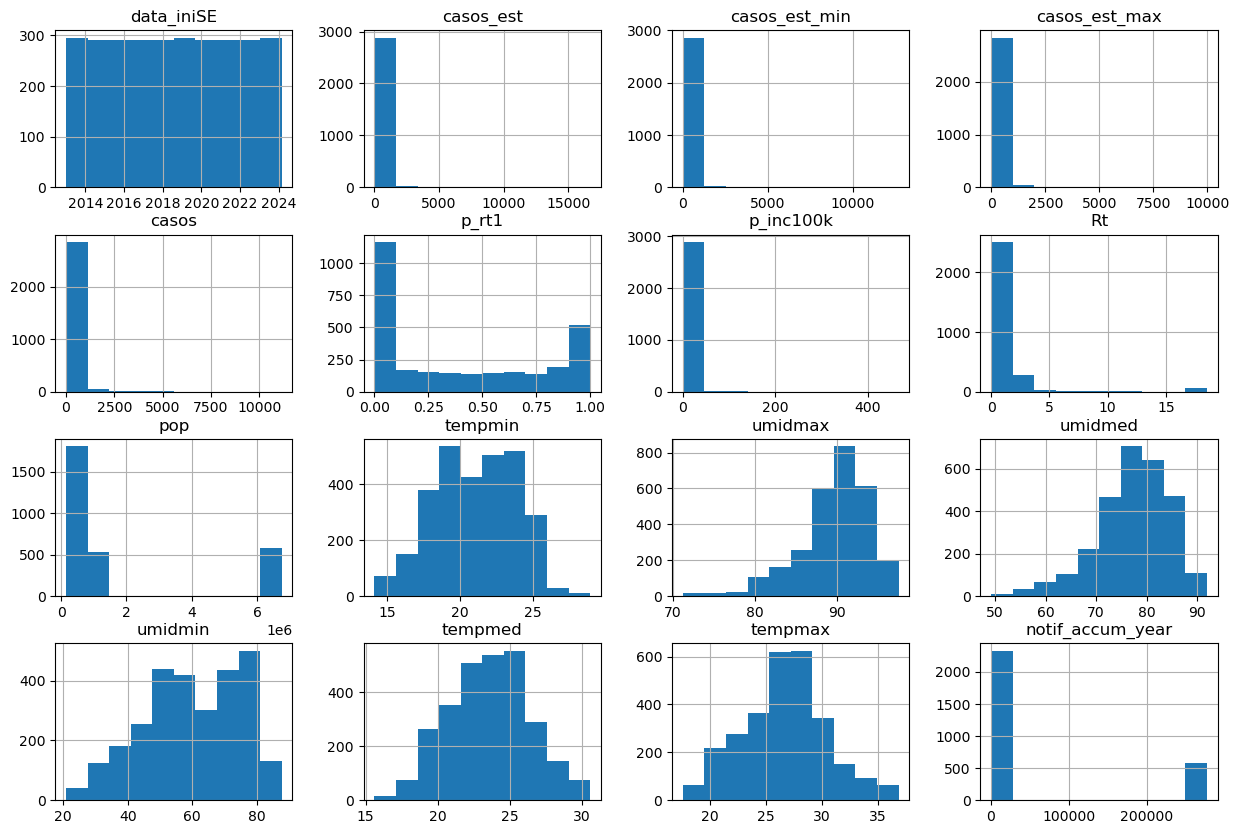

In [28]:
#Exibindo um histograma
df_dados_01.hist(figsize = (15,10))


In [29]:
#Distruibuição da população
df_dados_01['pop'].unique()

array([ 446731.,  513118.,  782799.,  924624.,  150281.,  162693.,
       6625849., 6747815.,  393773.,  472906.])

In [30]:
#Variação de notificação por ano

df_dados_01['notif_accum_year'].unique()

array([  5410,  16077,    839, 276529,   8020], dtype=int64)

In [31]:
#Variação de notificação 
df_dados_01['casos_est'].value_counts().head()

casos_est
0.0    765
1.0    271
2.0    159
3.0    126
4.0     95
Name: count, dtype: int64

In [32]:
df_dados_01['casos_est_min'].value_counts().head()

casos_est_min
0    766
1    271
2    161
3    126
4     94
Name: count, dtype: int64

In [33]:
df_dados_01['casos_est_max'].value_counts().head()

casos_est_max
0.0    764
1.0    271
2.0    159
3.0    123
4.0     94
Name: count, dtype: int64

In [34]:
df_dados_01.isnull().sum()

data_iniSE           0
casos_est            0
casos_est_min        0
casos_est_max        4
casos                0
p_rt1                0
p_inc100k            0
nivel                0
Rt                   0
pop                  0
tempmin              0
umidmax             90
receptivo            0
transmissao          0
nivel_inc            0
umidmed             90
umidmin             90
tempmed             90
tempmax             90
notif_accum_year     0
cidade               0
dtype: int64

In [35]:
#Exibindo o tipo da colunas
df_dados_01.dtypes

data_iniSE          datetime64[ns]
casos_est                  float64
casos_est_min                int64
casos_est_max              float64
casos                        int64
p_rt1                      float64
p_inc100k                  float64
nivel                       object
Rt                         float64
pop                        float64
tempmin                    float64
umidmax                    float64
receptivo                   object
transmissao                 object
nivel_inc                   object
umidmed                    float64
umidmin                    float64
tempmed                    float64
tempmax                    float64
notif_accum_year             int64
cidade                      object
dtype: object

In [36]:
#Exibindo a quantidade de casos por cidade

df_dados_01.head()

,data_iniSE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,nivel,Rt,pop,...,umidmax,receptivo,transmissao,nivel_inc,umidmed,umidmin,tempmed,tempmax,notif_accum_year,cidade
SE,,,,,,,,,,,,,,,,,,,,,
202409,2024-02-25,90.0,13,484.0,0,0.951627,20.146353,vermelho,1.301818,446731.0,...,80.238996,favorável,possível,acima do limiar epidêmico,78.586575,76.934153,27.285714,27.571429,5410,Belfort roxo
202408,2024-02-18,86.0,33,327.0,27,0.991860,19.250960,vermelho,1.498019,446731.0,...,84.020427,favorável,possível,acima do limiar epidêmico,83.101152,82.184083,26.007936,26.095238,5410,Belfort roxo
202407,2024-02-11,66.0,39,195.0,37,0.974624,14.773992,vermelho,1.450320,446731.0,...,71.225541,favorável,possível,acima do limiar epidêmico,70.261777,69.463740,27.969697,28.181818,5410,Belfort roxo
202406,2024-02-04,60.0,48,125.0,47,0.993117,13.430902,vermelho,1.662640,446731.0,...,84.645586,favorável,possível,acima do limiar epidêmico,81.745728,79.026456,25.780702,26.210526,5410,Belfort roxo
202405,2024-01-28,46.0,42,75.0,42,0.957307,10.297025,vermelho,1.482333,446731.0,...,87.269122,favorável,possível,acima do limiar epidêmico,86.465806,85.662492,24.571429,24.714286,5410,Belfort roxo


In [37]:
df_dados_01['casos'].nunique()



368

In [38]:
df_dados_01['casos'].dtypes

dtype('int64')

In [113]:
df_dados_01.head()

,data_iniSE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,nivel,Rt,pop,...,receptivo,transmissao,nivel_inc,umidmed,umidmin,tempmed,tempmax,notif_accum_year,cidade,Mes_epidemia
SE,,,,,,,,,,,,,,,,,,,,,
202409,2024-02-25,90.0,13,484.0,0,0.951627,20.146353,vermelho,1.301818,446731.0,...,favorável,possível,acima do limiar epidêmico,78.586575,76.934153,27.285714,27.571429,5410,Belfort roxo,Fevereiro
202408,2024-02-18,86.0,33,327.0,27,0.991860,19.250960,vermelho,1.498019,446731.0,...,favorável,possível,acima do limiar epidêmico,83.101152,82.184083,26.007936,26.095238,5410,Belfort roxo,Fevereiro
202407,2024-02-11,66.0,39,195.0,37,0.974624,14.773992,vermelho,1.450320,446731.0,...,favorável,possível,acima do limiar epidêmico,70.261777,69.463740,27.969697,28.181818,5410,Belfort roxo,Fevereiro
202406,2024-02-04,60.0,48,125.0,47,0.993117,13.430902,vermelho,1.662640,446731.0,...,favorável,possível,acima do limiar epidêmico,81.745728,79.026456,25.780702,26.210526,5410,Belfort roxo,Fevereiro
202405,2024-01-28,46.0,42,75.0,42,0.957307,10.297025,vermelho,1.482333,446731.0,...,favorável,possível,acima do limiar epidêmico,86.465806,85.662492,24.571429,24.714286,5410,Belfort roxo,Janeiro


In [114]:
#Salvando em csv

df_dados_01.to_csv('dataset_dengue_rj.csv', encoding='UTF-8', index=False)